# MARKET BASKET ANALYSIS 

1. [Introduction](#introducere)<br>
    1.1 [About the project](#proiect)
2. [Association tehniques](#asociere)<br>
    2.1 [Machine Learning tehniques](#ML)<br>
    2.2 [Apriori](#apriori1)
3. [Data Collection](#colectare)
4. [Database Refining](#filtrare)
5. [Data Analysis and Vizualisation](#vizualizare)
6. [Data Modelling using the Apriori Algorithm](#apriori2)
7. [Conclusion](#concluzie)
8. [Bibliography](#bibliografie)

<a name="introducere"></a> <b>INTRODUCTION</b>

* ABOUT THE PROJECT <a name="proiect"></a> <br>
 <br>
 Market Basket Analysis started to be one of the most used marketing tehniques of the 21st century for the analysis of the costumer behaviour. World's biggest companies such as Amazon, Netflix, Spotify, Meta and Tesla apply market basket analysis in order to discover hidden patterns and behaviours from beneath the huge databases. This method studies the products that are frequently bought together and the interesting relationships between them.The result of the analysis is represented by a set of rules based on the condition: "if this then that". <br>

1. <B>Library Imports</b>

In [5]:
import numpy as np
import pandas as pd
import os
import zipfile
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from IPython.display import display
import random
import sqlite3

In [6]:
df_aisle=pd.read_csv('aisles.csv')
df_departments=pd.read_csv('departments.csv')
df_products=pd.read_csv('products.csv')
df_prior_order=pd.read_csv('order_products__prior.csv')
df_orders=pd.read_csv('orders.csv')

<B> Database Refining <B>

In [8]:
df_orders.drop(df_orders.index[500000:3421083], inplace=True)

In [7]:
df_orders.sort_values('order_number')
df_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [9]:
df_orders.shape

(500000, 7)

In [10]:
#df_prior_order
df_prior_order.drop(df_prior_order.index[500000:34234489], inplace=True)

In [11]:
order=pd.merge(df_orders,df_prior_order, on='order_id')
product=pd.merge(df_products,order, on='product_id')
department=pd.merge(product,df_departments,on='department_id')
table=pd.merge(department,df_aisle, on='aisle_id')

In [12]:
table.head()

,product_id,product_name,aisle_id,department_id,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,19989,4122,prior,11,2,7,8.0,1,0,snacks,cookies cakes
1,1,Chocolate Sandwich Cookies,61,19,49629,11119,prior,18,1,14,30.0,1,0,snacks,cookies cakes
2,1,Chocolate Sandwich Cookies,61,19,52768,21054,prior,3,1,10,30.0,1,1,snacks,cookies cakes
3,1,Chocolate Sandwich Cookies,61,19,38944,22561,prior,4,6,21,23.0,6,0,snacks,cookies cakes
4,449,Chips Ahoy! Chewy Cookies,61,19,34791,4609,prior,11,4,19,17.0,4,1,snacks,cookies cakes


In [13]:
#Sorted the table by the order number
table.sort_values(by=['order_number'], ascending=True,inplace=True)
table

,product_id,product_name,aisle_id,department_id,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,department,aisle
65362,39475,Total Greek Strained Yogurt,120,16,46907,14505,prior,1,1,11,NaN,14,0,dairy eggs,yogurt
24391,8518,Organic Red Onion,83,4,9309,12477,prior,1,4,17,NaN,17,0,produce,fresh vegetables
66636,13249,Skim Milk,84,16,1838,18244,prior,1,3,14,NaN,7,0,dairy eggs,milk
44477,12341,Hass Avocados,32,4,26949,8579,prior,1,1,19,NaN,10,0,produce,packaged produce
40628,31915,Organic Red Delicious Apple,24,4,3299,8967,prior,1,0,20,NaN,10,0,produce,fresh fruits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59178,16185,Sharp Cheddar Cheese,21,16,19149,10934,prior,99,5,12,6.0,9,1,dairy eggs,packaged cheese
3493,25613,Homestyle Popcorn,23,19,19149,10934,prior,99,5,12,6.0,12,1,snacks,popcorn jerky
41128,38693,Meyer Lemon,24,4,19149,10934,prior,99,5,12,6.0,3,1,produce,fresh fruits
4604,14828,Select Cashews Almonds & Pecans Mixed Nuts,117,19,19149,10934,prior,99,5,12,6.0,10,1,snacks,nuts seeds dried fruit


In [14]:
#Reduced redundant rows
table.drop(table.index[51000:72909], inplace=True)

In [15]:
table.shape

(51000, 15)

In [16]:
table.isna().sum()

product_id                   0
product_name                 0
aisle_id                     0
department_id                0
order_id                     0
user_id                      0
eval_set                     0
order_number                 0
order_dow                    0
order_hour_of_day            0
days_since_prior_order    4773
add_to_cart_order            0
reordered                    0
department                   0
aisle                        0
dtype: int64

In [17]:
#deleted the missing data
table['days_since_prior_order'].dropna()

8439     30.0
47492    15.0
7169     30.0
65283    10.0
25491     8.0
         ... 
27366     7.0
13649     3.0
23164     8.0
86        3.0
71731    11.0
Name: days_since_prior_order, Length: 46227, dtype: float64

In [15]:
table['department'].unique()

array(['dairy eggs', 'produce', 'snacks', 'beverages', 'breakfast',
       'pantry', 'babies', 'canned goods', 'household', 'pets',
       'meat seafood', 'deli', 'dry goods pasta', 'frozen',
       'international', 'bakery', 'personal care', 'missing', 'alcohol',
       'other', 'bulk'], dtype=object)

In [16]:
table.dtypes

product_id                  int64
product_name               object
aisle_id                    int64
department_id               int64
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
add_to_cart_order           int64
reordered                   int64
department                 object
aisle                      object
dtype: object

In [19]:
#Deleted unnecessary columns
table.drop(['aisle_id', 'department_id', 'days_since_prior_order', 'eval_set'], axis=1, inplace=True)
table.head()

,product_id,product_name,order_id,user_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,reordered,department,aisle
65362,39475,Total Greek Strained Yogurt,46907,14505,1,1,11,14,0,dairy eggs,yogurt
24391,8518,Organic Red Onion,9309,12477,1,4,17,17,0,produce,fresh vegetables
66636,13249,Skim Milk,1838,18244,1,3,14,7,0,dairy eggs,milk
44477,12341,Hass Avocados,26949,8579,1,1,19,10,0,produce,packaged produce
40628,31915,Organic Red Delicious Apple,3299,8967,1,0,20,10,0,produce,fresh fruits


In [20]:
#Modifyed the column names with the significant ones
table.rename(columns = {'product_id':'id_produs', 'product_name':'nume_produs','aisle':'tip_produs','order_id':'id_comanda',
                        'user_id':'id_cumparator','order_number':'nr_comanda','order_dow':'zi','order_hour_of_day':'ora',
                        'department':'departament','reordered':'comandat_din_nou','add_to_cart_order':'ordine_produs_adaugat'}, inplace = True)

In [21]:
table.head()

,id_produs,nume_produs,id_comanda,id_cumparator,nr_comanda,zi,ora,ordine_produs_adaugat,comandat_din_nou,departament,tip_produs
65362,39475,Total Greek Strained Yogurt,46907,14505,1,1,11,14,0,dairy eggs,yogurt
24391,8518,Organic Red Onion,9309,12477,1,4,17,17,0,produce,fresh vegetables
66636,13249,Skim Milk,1838,18244,1,3,14,7,0,dairy eggs,milk
44477,12341,Hass Avocados,26949,8579,1,1,19,10,0,produce,packaged produce
40628,31915,Organic Red Delicious Apple,3299,8967,1,0,20,10,0,produce,fresh fruits


In [22]:
#Transformam cifrele in zile                                  
table['zi']=table['zi'].astype(str)
table['zi']=table['zi'].replace('0','Sambata')
table['zi']=table['zi'].str.replace('1','Duminica') 
table['zi']=table['zi'].replace('2','Luni')
table['zi']=table['zi'].replace('3','Marti')
table['zi']=table['zi'].replace('4','Miercuri')
table['zi']=table['zi'].replace('5','Joi')
table['zi']=table['zi'].replace('6','Vineri')

In [23]:
table.head()

,id_produs,nume_produs,id_comanda,id_cumparator,nr_comanda,zi,ora,ordine_produs_adaugat,comandat_din_nou,departament,tip_produs
65362,39475,Total Greek Strained Yogurt,46907,14505,1,Duminica,11,14,0,dairy eggs,yogurt
24391,8518,Organic Red Onion,9309,12477,1,Miercuri,17,17,0,produce,fresh vegetables
66636,13249,Skim Milk,1838,18244,1,Marti,14,7,0,dairy eggs,milk
44477,12341,Hass Avocados,26949,8579,1,Duminica,19,10,0,produce,packaged produce
40628,31915,Organic Red Delicious Apple,3299,8967,1,Sambata,20,10,0,produce,fresh fruits


In [24]:
#Transformed the numbers from the hours column to the datetime format
hour_nums = list(range(24))
hours_of_day = {hour_num:datetime.time(hour_num).strftime("%I:00 %p") for hour_num in hour_nums}
table['ora'] = table['ora'].replace(to_replace=hours_of_day, value=None)
table['ora'] = pd.Categorical(table['ora'], 
                                             ordered=True, 
                                             categories=list(hours_of_day.values()))

In [25]:
table.head()

,id_produs,nume_produs,id_comanda,id_cumparator,nr_comanda,zi,ora,ordine_produs_adaugat,comandat_din_nou,departament,tip_produs
65362,39475,Total Greek Strained Yogurt,46907,14505,1,Duminica,11:00 AM,14,0,dairy eggs,yogurt
24391,8518,Organic Red Onion,9309,12477,1,Miercuri,05:00 PM,17,0,produce,fresh vegetables
66636,13249,Skim Milk,1838,18244,1,Marti,02:00 PM,7,0,dairy eggs,milk
44477,12341,Hass Avocados,26949,8579,1,Duminica,07:00 PM,10,0,produce,packaged produce
40628,31915,Organic Red Delicious Apple,3299,8967,1,Sambata,08:00 PM,10,0,produce,fresh fruits


In [16]:
#Analyzed the unique departments
table['departament'].unique()

array(['produce', 'frozen', 'breakfast', 'dry goods pasta', 'dairy eggs',
       'snacks', 'meat seafood', 'canned goods', 'deli', 'beverages',
       'pantry', 'personal care', 'household', 'international', 'bakery',
       'babies', 'missing', 'other', 'alcohol', 'pets'], dtype=object)

In [31]:
#Analyzed the number of clients
table['id_cumparator'].nunique()

4650

<b> Database Analysis

The absolute frequency of the orders by department

<AxesSubplot:title={'center':'Frecvenţa comenzilor în funcţie de departament'}, ylabel='Frecvenţa absolută'>

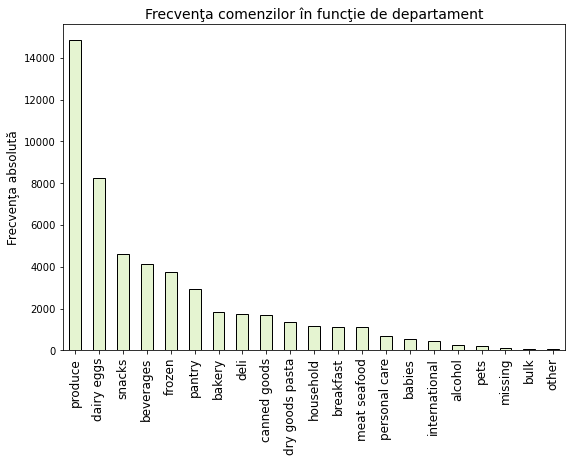

In [32]:
import matplotlib.pyplot as plt
frecventa_abs=(table['departament'].value_counts())
plt.rcParams['figure.figsize']=(9,6)
plt.title('Frecvenţa comenzilor în funcţie de departament',fontsize=14)
plt.xticks(rotation=35,fontsize=12)
plt.ylabel('Frecvenţa absolută',fontsize=12)
frecventa_abs.plot(kind='bar',color=(0.5, 0.8, 0.1, 0.2), edgecolor='black')

Total purchased products vs the ones that weren't purchased

In [33]:
#COD PENTRU PROCENTELE DIN EXCEL
comandat0=table['comandat_din_nou'].replace(0,'Nu')
comandat=comandat0.replace(1,'Da')
total_prod_comandate = table.shape[0]                                         #Pun in paint procent!!!!!!!!!1
procent_produse_recomandate = comandat.value_counts()/total_prod_comandate
procent = pd.DataFrame(procent_produse_recomandate) 
procent

,comandat_din_nou
Da,0.516078
Nu,0.483922


<AxesSubplot:title={'center':'Frecventa produselor comandate din nou'}, xlabel='Comandate din nou', ylabel='Procent'>

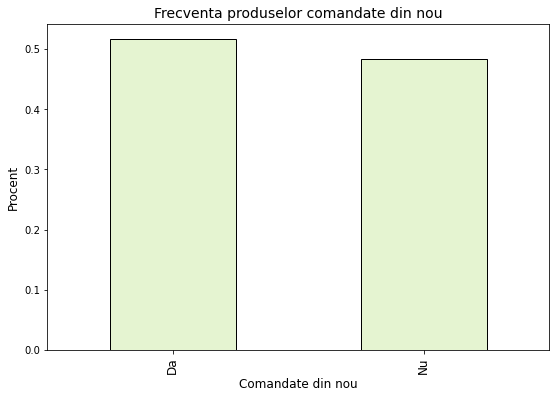

In [34]:
comandat0=table['comandat_din_nou'].replace(0,'Nu')
comandat=comandat0.replace(1,'Da')
total_prod_comandate = table.shape[0]                                         
procent_produse_recomandate = comandat.value_counts()/total_prod_comandate
procent = pd.DataFrame(procent_produse_recomandate) 
comandat0=table['comandat_din_nou'].replace(0,'Nu')
comandat=comandat0.replace(1,'Da')
total_prod_comandate = table.shape[0]                                         
procent_produse_recomandate = comandat.value_counts()/total_prod_comandate
plt.rcParams['figure.figsize']=(9,6)
plt.title('Frecventa produselor comandate din nou',fontsize=14)
plt.xticks(rotation=30,fontsize=12)
plt.xlabel('Comandate din nou',fontsize=12)
plt.ylabel('Procent',fontsize=12)
procent_produse_recomandate.plot(kind='bar',color=(0.5, 0.8, 0.1, 0.2), edgecolor='black')

The effect of the weekdays on costumer's behaviour

In [35]:
table['zi'] = pd.Categorical(table['zi'], ['Luni','Marti','Miercuri','Joi','Vineri','Sambata','Duminica'])

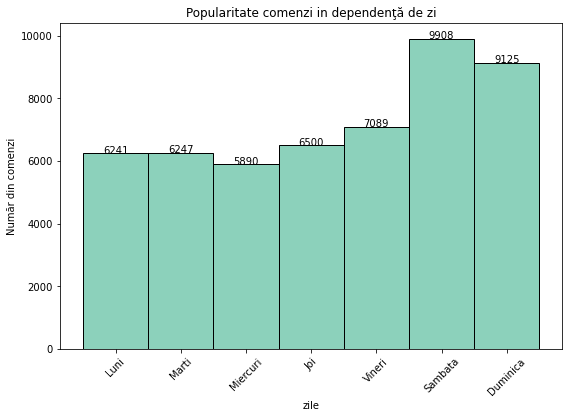

In [36]:
import seaborn as sns
sns.set_palette(sns.color_palette("Set2"))
ax=sns.histplot(data=table, x='zi',bins=7)
plt.xlabel('zile')
plt.ylabel('Număr din comenzi')
plt.title('Popularitate comenzi in dependenţă de zi')
plt.xticks(rotation= 45)
for p in ax.patches:
 height = p.get_height() 
 ax.text(x = p.get_x()+(p.get_width()/2), y = height+ 2, s = '{:.0f}'.format(height), ha = 'center')
plt.show()

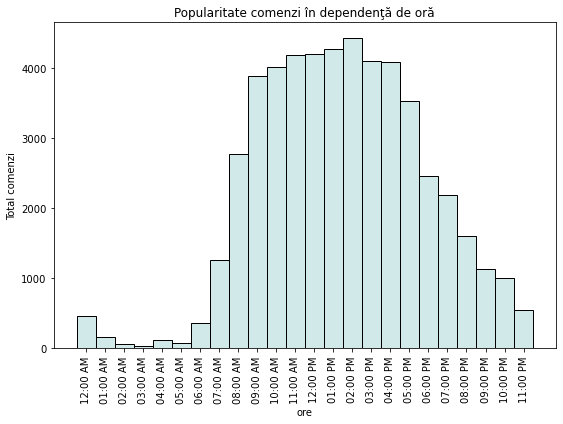

In [38]:
sns.set_palette(sns.color_palette("ch:start=.2,rot=-.3"))
ax=sns.histplot(data=table, x='ora',bins=24)
plt.xlabel('ore')
plt.ylabel('Total comenzi')
plt.title('Popularitate comenzi în dependenţă de oră')
plt.xticks(rotation= 90)
plt.show()

Product analysis

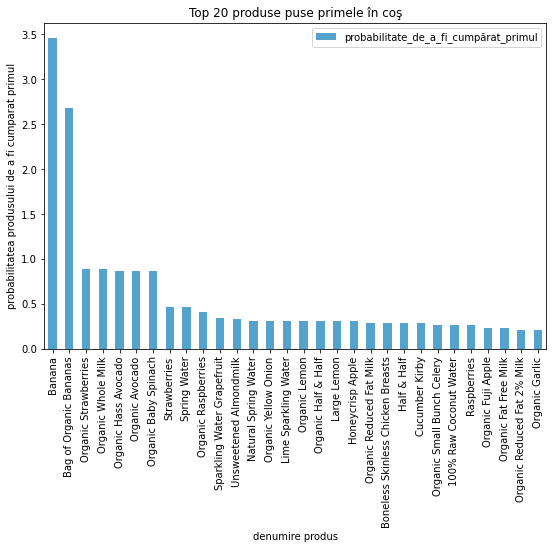

In [40]:
#Top 20 products placed first in the cart
total_comenzi = table['id_comanda'].nunique()
# Sortare produs dupa nr de ori adaugat in cos
primul_produs_comandat = table[table['ordine_produs_adaugat'] == 1]
primul_produs_frecv_desc = primul_produs_comandat.groupby(['nume_produs'], as_index = False)
['id_comanda'].count().sort_values(by=['id_comanda'], ascending=False)
primul_produs_frecv_desc['count_of_ordering_first'] = primul_produs_frecv_desc['id_comanda']
primul_produs_frecv_desc['probabilitate_de_a_fi_cumpărat_primul'] 
= (primul_produs_frecv_desc['count_of_ordering_first']/total_comenzi)* 100
sns.set_palette(sns.color_palette("icefire"))
primul_produs_frecv_desc.iloc[:30].plot.bar(x='nume_produs', y='probabilitate_de_a_fi_cumpărat_primul')
plt.ylabel('probabilitatea produsului de a fi cumparat primul')
plt.xlabel('denumire produs')
plt.xticks(rotation=90)
plt.title('Top 20 produse puse primele în coş')
plt.show()


In [36]:
#Adaugam coloana de Produse Bio
Bio = table['nume_produs'].str.contains('Organic')
table['produs_bio'] = Bio
table.head()

,id_produs,nume_produs,id_comanda,id_cumparator,nr_comanda,zi,ora,ordine_produs_adaugat,comandat_din_nou,departament,tip_produs,produs_bio
0,1,Chocolate Sandwich Cookies,19989,4122,11,Luni,07:00 AM,1,0,snacks,cookies cakes,False
1,1,Chocolate Sandwich Cookies,49629,11119,18,Duminica,02:00 PM,1,0,snacks,cookies cakes,False
2,1,Chocolate Sandwich Cookies,77436,16057,2,Luni,12:00 PM,1,0,snacks,cookies cakes,False
3,1,Chocolate Sandwich Cookies,52768,21054,3,Duminica,10:00 AM,1,1,snacks,cookies cakes,False
4,1,Chocolate Sandwich Cookies,38944,22561,4,Vineri,09:00 PM,6,0,snacks,cookies cakes,False


In [52]:
(table['produs_bio']==True).value_counts()

False    70315
True     29685
Name: produs_bio, dtype: int64

In [66]:
#procent produse bio                                                         MA MAI UIT AICI
este_bio=table['produs_bio'].replace(True,'Bio')
nu_este_bio=este_bio.replace(False,'Nu este bio')
nu_este_bio=pd.DataFrame(nu_este_bio)
nu_este_bio.dtypes

produs_bio    object
dtype: object

<b>APRIORI</b>

In [71]:
#pip install mlxtend  

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [60]:
df=table

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
#Frecventa produsului in dependenta de numarul de comenzi in care apare
produse_count= table.groupby('id_produs')['id_comanda'].count().reset_index().rename(columns = {'id_comanda':'frecventa'})
produse_count= produse_count.sort_values('frecventa', ascending=False)[0:100].reset_index(drop=True)
produse_count.head(10)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id_produs,frecventa
0,24852,765
1,13176,556
2,21137,444
3,21903,374
4,47209,348
5,47766,294
6,47626,220
7,16797,220
8,26209,214
9,27966,198


In [44]:
freq_products = list(produse_count.id_produs)
freq_products[1:10]

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27966]

In [46]:
freq_products = list(produse_count.id_produs)
df1 = table[table.id_produs.isin(freq_products)]
basket = df1.pivot_table(columns='nume_produs', values='comandat_din_nou', index='id_comanda').reset_index().fillna(0).set_index('id_comanda')

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(11687, 11)

In [47]:
#basket = df1.pivot_table(columns='nume_produs', values='comandat_din_nou', index='id_comanda').reset_index().fillna(0).set_index('id_comanda')

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
#transformăm toate valorile pozitive în 1 şi valorile negative în 0
def transf_val(x):
    if x<= 0:
        return 0
    if x>= 1:
        return 1
basket_set = basket.applymap(transf_val)
basket_set


C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nume_produs,100% Raw Coconut Water,100% Whole Wheat Bread,Apple Honeycrisp Organic,Asparagus,Bag of Organic Bananas,Banana,Bartlett Pears,Blueberries,Boneless Skinless Chicken Breasts,Broccoli Crown,...,Sparkling Natural Mineral Water,Sparkling Water Grapefruit,Spring Water,Strawberries,Total Greek Strained Yogurt,Uncured Genoa Salami,Unsweetened Almondmilk,Unsweetened Original Almond Breeze Almond Milk,Vanilla Almond Breeze Almond Milk,Yellow Onions
id_comanda,,,,,,,,,,,,,,,,,,,,,
46,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
set_produse_frecvente= apriori(basket_set, min_support=0.01, use_colnames=True)
reguli= association_rules(set_produse_frecvente,metric="lift", min_threshold=1)
reguli

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Organic Baby Spinach),(Bag of Organic Bananas),0.075204,0.115804,0.015259,0.202899,1.752089,0.006550,1.109264
1,(Bag of Organic Bananas),(Organic Baby Spinach),0.115804,0.075204,0.015259,0.131765,1.752089,0.006550,1.065144
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.074659,0.115804,0.015259,0.204380,1.764878,0.006613,1.111329
3,(Bag of Organic Bananas),(Organic Hass Avocado),0.115804,0.074659,0.015259,0.131765,1.764878,0.006613,1.065772
4,(Organic Strawberries),(Bag of Organic Bananas),0.086649,0.115804,0.014986,0.172956,1.493526,0.004952,1.069104
5,(Bag of Organic Bananas),(Organic Strawberries),0.115804,0.086649,0.014986,0.129412,1.493526,0.004952,1.049120
6,(Banana),(Large Lemon),0.162943,0.034060,0.010627,0.065217,1.914783,0.005077,1.033331
7,(Large Lemon),(Banana),0.034060,0.162943,0.010627,0.312000,1.914783,0.005077,1.216653
8,(Organic Avocado),(Banana),0.053678,0.162943,0.016349,0.304569,1.869175,0.007602,1.203652
9,(Banana),(Organic Avocado),0.162943,0.053678,0.016349,0.100334,1.869175,0.007602,1.051859


In [69]:
#Sortare reguli dupa relevanta lor
reguli.sort_values(['lift'], ascending=False, inplace=True)
reguli

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(Organic Baby Spinach),(Organic Hass Avocado),0.075204,0.074659,0.013351,0.177536,2.377949,0.007737,1.125084
15,(Organic Hass Avocado),(Organic Baby Spinach),0.074659,0.075204,0.013351,0.178832,2.377949,0.007737,1.126196
19,(Organic Strawberries),(Organic Hass Avocado),0.086649,0.074659,0.013624,0.157233,2.106000,0.007155,1.097979
18,(Organic Hass Avocado),(Organic Strawberries),0.074659,0.086649,0.013624,0.182482,2.106000,0.007155,1.117225
6,(Banana),(Large Lemon),0.162943,0.034060,0.010627,0.065217,1.914783,0.005077,1.033331
7,(Large Lemon),(Banana),0.034060,0.162943,0.010627,0.312000,1.914783,0.005077,1.216653
9,(Banana),(Organic Avocado),0.162943,0.053678,0.016349,0.100334,1.869175,0.007602,1.051859
8,(Organic Avocado),(Banana),0.053678,0.162943,0.016349,0.304569,1.869175,0.007602,1.203652
2,(Organic Hass Avocado),(Bag of Organic Bananas),0.074659,0.115804,0.015259,0.204380,1.764878,0.006613,1.111329
3,(Bag of Organic Bananas),(Organic Hass Avocado),0.115804,0.074659,0.015259,0.131765,1.764878,0.006613,1.065772


In [72]:
#!pip install arulesviz
import numpy as np
import networkx as nx 

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
support = reguli['support'].values
confidence = reguli['confidence'].values
for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence,fit_reg=False)

plt.gcf().clear()
draw_graph(reguli,10)

C:\Users\User\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


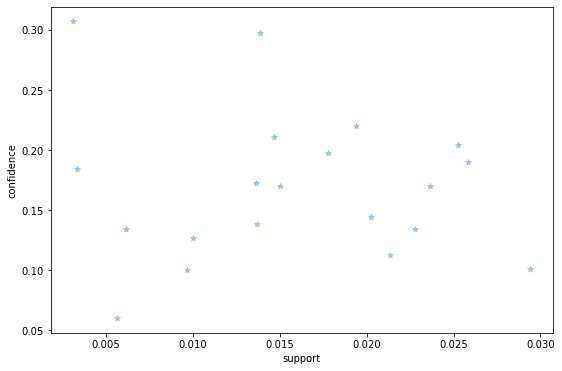

In [80]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

<a name="colectare"></a> <b>COLECTAREA DATELOR</b>

<a name="filtrare"></a> <b>FILTRAREA BAZEI DE DATE</b>

<a name="vizualizare"></a> <b>VIZUALIZAREA SI ANALIZAREA DATELOR</b>

<a name="introducere"></a> <b>UTILIZAREA ALGORITMULUI APRIORI</b>

<a name="cuprins"></a> <b>CUPRINS</b>

<a name="concluzie"></a> <b>CONCLUZIE</b>

<a name="bibliografie"></a> <b>BIBLIOGRAFIE</b>